# WeatherPY

## Analysis
1) Temperature Decreases as the latitude increased across the geography
2) In majority of the cities humidity ranges from 60 to 100
3) In majority of the cities wind speed ranges from 2 to 8 mph

In [4]:
#!pip install citipy

In [5]:
from citipy import citipy

In [6]:
from random import uniform
import pandas as pd
import numpy as np
import csv
import random
import matplotlib.pyplot as plt
import requests as req
import json
import seaborn as sns
from datetime import datetime as dt

# Generate Cities Lat and Lng

In [7]:
def newpoint():
    return uniform(-90,90), uniform(-180,180)

points = []
points = (newpoint() for x in range(1500))

# for x in points:
#     print(x)

columns = ("Lat", "Lng")
City_df = pd.DataFrame([x for x in points], columns=columns)
City_df.head()


,Lat,Lng
0,-39.658454,-129.889057
1,-54.093423,-114.394525
2,-26.509095,31.877932
3,-82.421188,77.412390
4,84.529373,63.642179


# Perform API Calls & Generate cities name

In [8]:
City_df["City"] = ""
City_df["Country"] = ""

In [9]:
for index, row in City_df.iterrows():
    city = citipy.nearest_city(row['Lat'], row['Lng']).city_name
    country = citipy.nearest_city(row['Lat'], row['Lng']).country_code
    City_df.set_value(index, "City", city)
    City_df.set_value(index, "Country", country)


In [10]:
City_Sample = City_df.drop_duplicates(subset='City').sample(n=500).reset_index()

In [11]:
City_Sample.count()

index      500
Lat        500
Lng        500
City       500
Country    500
dtype: int64

In [12]:
City_Sample["Temp"] = ""
City_Sample["Humidity"] = ""
City_Sample["Date"] = ""
City_Sample["Wind Speed"] = ""
City_Sample["Cloudiness"] = ""
del City_Sample['index']
City_Sample.head()

,Lat,Lng,City,Country,Temp,Humidity,Date,Wind Speed,Cloudiness
0,-19.122915,31.170900,mvuma,zw,,,,,
1,83.853091,40.161730,tumannyy,ru,,,,,
2,13.301622,92.167281,port blair,in,,,,,
3,-25.388624,-29.258653,vila velha,br,,,,,
4,19.168420,-107.813105,tomatlan,mx,,,,,


In [22]:
#API Keys
api_key = "e49d4a61cb099e62e98803099b4e1591"
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

In [26]:
# Fetchig data from API and saving it in Data Frame

print("Beginning Data Retrieval")
counter = 0
for index, row in City_Sample.iterrows():
    target_url = "http://api.openweathermap.org/data/2.5/weather?units=%s&APPID=%s&q=%s" % (units,api_key, row['City'])
    cities_data = req.get(target_url).json()
    City_Sample.set_value(index, "Temp", cities_data["main"]["temp_max"])
    City_Sample.set_value(index, "Humidity", cities_data["main"]["humidity"])
    City_Sample.set_value(index, "Date", cities_data["dt"])
    City_Sample.set_value(index, "Wind Speed", cities_data["wind"]["speed"])
    City_Sample.set_value(index, "Cloudiness", cities_data["clouds"]["all"])
    counter = counter + 1
       
    print("------------------------")
    print("Proceesing Record : " , counter, '|' , cities_data["name"])
    print(target_url)


Beginning Data Retrieval
------------------------
Proceesing Record :  1 | Mvuma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e49d4a61cb099e62e98803099b4e1591&q=mvuma
------------------------
Proceesing Record :  2 | Teriberka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e49d4a61cb099e62e98803099b4e1591&q=tumannyy
------------------------
Proceesing Record :  3 | Port Blair
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e49d4a61cb099e62e98803099b4e1591&q=port blair
------------------------
Proceesing Record :  4 | Vila Velha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e49d4a61cb099e62e98803099b4e1591&q=vila velha
------------------------
Proceesing Record :  5 | Tomatlan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e49d4a61cb099e62e98803099b4e1591&q=tomatlan
------------------------
Proceesing Record :  6 | Ternate
http://api.openweathermap.org/data/2.5/weather?units=Imperi

------------------------
Proceesing Record :  51 | Megion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e49d4a61cb099e62e98803099b4e1591&q=megion
------------------------
Proceesing Record :  52 | Shenkursk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e49d4a61cb099e62e98803099b4e1591&q=shenkursk
------------------------
Proceesing Record :  53 | Bibbiena
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e49d4a61cb099e62e98803099b4e1591&q=bibbiena
------------------------
Proceesing Record :  54 | Bathsheba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e49d4a61cb099e62e98803099b4e1591&q=bathsheba
------------------------
Proceesing Record :  55 | Cockburn Town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e49d4a61cb099e62e98803099b4e1591&q=cockburn town
------------------------
Proceesing Record :  56 | Mitsamiouli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID

------------------------
Proceesing Record :  99 | Ocara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e49d4a61cb099e62e98803099b4e1591&q=ocara
------------------------
Proceesing Record :  100 | Kargil
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e49d4a61cb099e62e98803099b4e1591&q=kargil
------------------------
Proceesing Record :  101 | Waingapu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e49d4a61cb099e62e98803099b4e1591&q=waingapu
------------------------
Proceesing Record :  102 | Mount Isa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e49d4a61cb099e62e98803099b4e1591&q=mount isa
------------------------
Proceesing Record :  103 | Veraval
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e49d4a61cb099e62e98803099b4e1591&q=veraval
------------------------
Proceesing Record :  104 | La Ronge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e49d4a61cb099e62e

------------------------
Proceesing Record :  148 | Guntakal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e49d4a61cb099e62e98803099b4e1591&q=guntakal
------------------------
Proceesing Record :  149 | Moosonee
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e49d4a61cb099e62e98803099b4e1591&q=moose factory
------------------------
Proceesing Record :  150 | Half Moon Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e49d4a61cb099e62e98803099b4e1591&q=half moon bay
------------------------
Proceesing Record :  151 | Canora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e49d4a61cb099e62e98803099b4e1591&q=canora
------------------------
Proceesing Record :  152 | Ush-Tyube
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e49d4a61cb099e62e98803099b4e1591&q=ushtobe
------------------------
Proceesing Record :  153 | Kinablangan
http://api.openweathermap.org/data/2.5/weather?units=Imperia

------------------------
Proceesing Record :  198 | Jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e49d4a61cb099e62e98803099b4e1591&q=jamestown
------------------------
Proceesing Record :  199 | San Juan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e49d4a61cb099e62e98803099b4e1591&q=marcona
------------------------
Proceesing Record :  200 | Srednekolymsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e49d4a61cb099e62e98803099b4e1591&q=srednekolymsk
------------------------
Proceesing Record :  201 | Westport
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e49d4a61cb099e62e98803099b4e1591&q=westport
------------------------
Proceesing Record :  202 | Chapais
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e49d4a61cb099e62e98803099b4e1591&q=chapais
------------------------
Proceesing Record :  203 | Ancud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=

------------------------
Proceesing Record :  246 | Dwarka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e49d4a61cb099e62e98803099b4e1591&q=dwarka
------------------------
Proceesing Record :  247 | Ostrovnoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e49d4a61cb099e62e98803099b4e1591&q=ostrovnoy
------------------------
Proceesing Record :  248 | Graaff-Reinet
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e49d4a61cb099e62e98803099b4e1591&q=graaff-reinet
------------------------
Proceesing Record :  249 | Salalah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e49d4a61cb099e62e98803099b4e1591&q=salalah
------------------------
Proceesing Record :  250 | Arlit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e49d4a61cb099e62e98803099b4e1591&q=arlit
------------------------
Proceesing Record :  251 | Pregassona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e49d

------------------------
Proceesing Record :  294 | Karakol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e49d4a61cb099e62e98803099b4e1591&q=karakol
------------------------
Proceesing Record :  295 | Doba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e49d4a61cb099e62e98803099b4e1591&q=doba
------------------------
Proceesing Record :  296 | Iquitos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e49d4a61cb099e62e98803099b4e1591&q=iquitos
------------------------
Proceesing Record :  297 | Mtambile
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e49d4a61cb099e62e98803099b4e1591&q=mtambile
------------------------
Proceesing Record :  298 | Rudnik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e49d4a61cb099e62e98803099b4e1591&q=amderma
------------------------
Proceesing Record :  299 | Kruisfontein
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e49d4a61cb099e62e

------------------------
Proceesing Record :  341 | Acajutla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e49d4a61cb099e62e98803099b4e1591&q=acajutla
------------------------
Proceesing Record :  342 | Canico
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e49d4a61cb099e62e98803099b4e1591&q=canico
------------------------
Proceesing Record :  343 | Oneonta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e49d4a61cb099e62e98803099b4e1591&q=oneonta
------------------------
Proceesing Record :  344 | Simpang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e49d4a61cb099e62e98803099b4e1591&q=simpang
------------------------
Proceesing Record :  345 | El Trompillo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e49d4a61cb099e62e98803099b4e1591&q=vaitupu
------------------------
Proceesing Record :  346 | Muḩāfaz̧at Dahūk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e49

------------------------
Proceesing Record :  391 | Flin Flon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e49d4a61cb099e62e98803099b4e1591&q=flin flon
------------------------
Proceesing Record :  392 | Sham Churasi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e49d4a61cb099e62e98803099b4e1591&q=saleaula
------------------------
Proceesing Record :  393 | Port Lincoln
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e49d4a61cb099e62e98803099b4e1591&q=port lincoln
------------------------
Proceesing Record :  394 | Krasnoarmeysk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e49d4a61cb099e62e98803099b4e1591&q=krasnoarmeysk
------------------------
Proceesing Record :  395 | Zhangye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e49d4a61cb099e62e98803099b4e1591&q=zhangye
------------------------
Proceesing Record :  396 | Chuy
http://api.openweathermap.org/data/2.5/weather?units=Imp

------------------------
Proceesing Record :  441 | Castro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e49d4a61cb099e62e98803099b4e1591&q=castro
------------------------
Proceesing Record :  442 | Acarau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e49d4a61cb099e62e98803099b4e1591&q=acarau
------------------------
Proceesing Record :  443 | Palmer
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e49d4a61cb099e62e98803099b4e1591&q=palmer
------------------------
Proceesing Record :  444 | Sayyan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e49d4a61cb099e62e98803099b4e1591&q=sayyan
------------------------
Proceesing Record :  445 | Tuatapere
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e49d4a61cb099e62e98803099b4e1591&q=tuatapere
------------------------
Proceesing Record :  446 | Hechi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e49d4a61cb099e62e988030

Proceesing Record :  490 | Kyaikkami
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e49d4a61cb099e62e98803099b4e1591&q=kyaikkami
------------------------
Proceesing Record :  491 | Carnarvon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e49d4a61cb099e62e98803099b4e1591&q=carnarvon
------------------------
Proceesing Record :  492 | Kokstad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e49d4a61cb099e62e98803099b4e1591&q=umzimvubu
------------------------
Proceesing Record :  493 | Rawson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e49d4a61cb099e62e98803099b4e1591&q=rawson
------------------------
Proceesing Record :  494 | Jinchang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e49d4a61cb099e62e98803099b4e1591&q=jinchang
------------------------
Proceesing Record :  495 | Trants
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e49d4a61cb099e62e98803099b4e1591&

In [27]:
City_Sample.head(5)

,Lat,Lng,City,Country,Temp,Humidity,Date,Wind Speed,Cloudiness
0,-19.122915,31.170900,mvuma,zw,49.81,52,1503517039,5.5,0
1,83.853091,40.161730,tumannyy,ru,44.77,100,1503517039,8.41,92
2,13.301622,92.167281,port blair,in,81.49,100,1503517039,16.02,88
3,-25.388624,-29.258653,vila velha,br,69.8,77,1503514800,13.87,90
4,19.168420,-107.813105,tomatlan,mx,82.57,79,1503517040,5.5,44


In [28]:
# save it to CSV file
City_Sample.to_csv("CityData.csv")

In [29]:
Date = dt.now().strftime("(%m/%d/%Y)")

# Latitude vs Temperature Plot

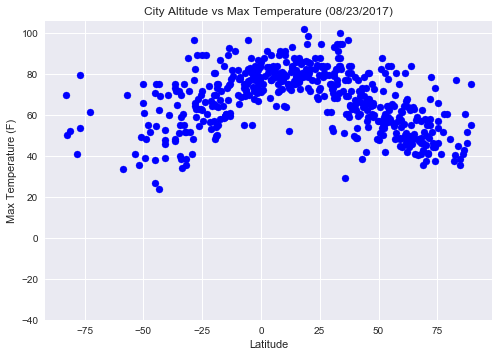

In [50]:
# Build a scatter plot for each data type
plt.scatter(City_Sample["Lat"], City_Sample["Temp"], marker="o", color = 'blue')

# # Incorporate the other graph properties
plt.title("City Altitude vs Max Temperature " + str(Date))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.yticks(np.arange(-40, 120, 20))
plt.grid(True)
sns.set_style('darkgrid')

# # Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()


# Latitude vs. Humidity Plot

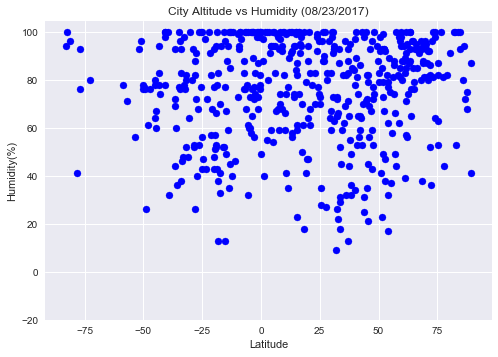

In [42]:
# Build a scatter plot for each data type
plt.scatter(City_Sample["Lat"], City_Sample["Humidity"], marker="o", color = 'blue')

# # Incorporate the other graph properties
plt.title("City Altitude vs Humidity " + str(Date))
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.yticks(np.arange(-20, 120, 20))
sns.set_style('darkgrid')

# # Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()


# Latitude vs. Cloudiness Plot

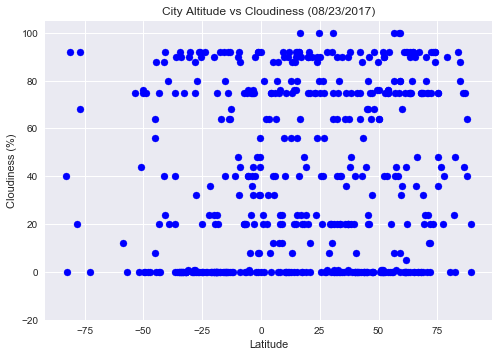

In [43]:
# Build a scatter plot for each data type
plt.scatter(City_Sample["Lat"], City_Sample["Cloudiness"], marker="o", color = 'blue')

# # Incorporate the other graph properties
plt.title("City Altitude vs Cloudiness " + str(Date))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.yticks(np.arange(-20, 120, 20))
sns.set_style('darkgrid')

# # Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

# Latitude vs. Wind Speed Plot

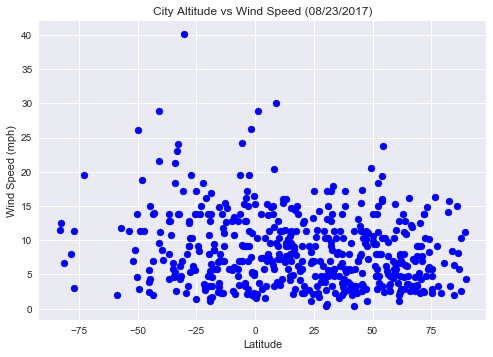

In [44]:
# Build a scatter plot for each data type
plt.scatter(City_Sample["Lat"], City_Sample["Wind Speed"], marker="o", color = 'blue')

# # Incorporate the other graph properties
plt.title("City Altitude vs Wind Speed " + str(Date))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

sns.set_style('darkgrid')

# # Save the figure
plt.savefig("WindSpeedInWorldCities.png")

# Show plot
plt.show()